Prelecture HW

1)

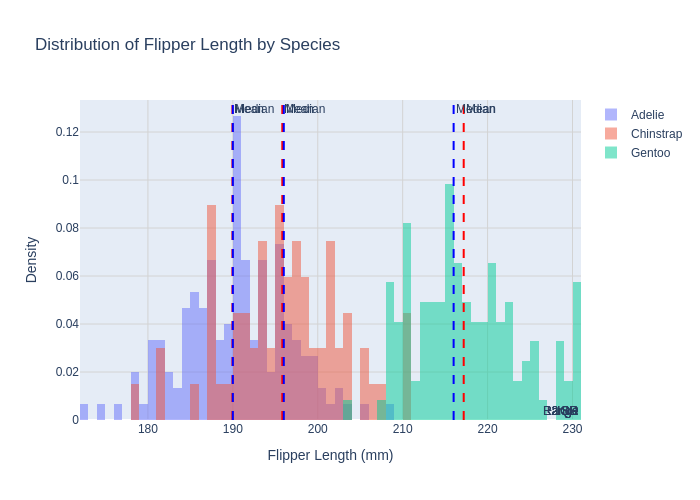

In [99]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Initialize a figure
fig = go.Figure()

# Loop through each species to create histograms
species = pingees['species'].unique()
for sp in species:
    # Filter the data for the current species
    data = pingees[pingees['species'] == sp]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    std_dev = data.std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Create histogram with clearer settings
    fig.add_trace(go.Histogram(
        x=data,
        name=sp,
        opacity=0.5,  # Reduced opacity
        histnorm='probability density',
        xbins=dict(start=min_val, end=max_val, size=1),  # Smaller bin size for more detail
    ))

    # Add mean and median lines
    fig.add_vline(x=mean, line_color='red', line_width=2, line_dash='dash',
                  annotation_text='Mean', annotation_position='top right')
    fig.add_vline(x=median, line_color='blue', line_width=2, line_dash='dash',
                  annotation_text='Median', annotation_position='top right')

    # Add rectangles for range and IQR
    fig.add_hrect(y0=0, y1=0.1, x0=min_val, x1=max_val, fillcolor='green', opacity=0.2,
                  line_width=0, annotation_text='Range', annotation_position='bottom right')
    fig.add_hrect(y0=0, y1=0.1, x0=Q1, x1=Q3, fillcolor='orange', opacity=0.3,
                  line_width=0, annotation_text='IQR', annotation_position='bottom right')
    fig.add_hrect(y0=0, y1=0.1, x0=lower_bound, x1=upper_bound, fillcolor='purple', opacity=0.2,
                  line_width=0, annotation_text='±2 SD', annotation_position='bottom right')

# Update layout with improved readability
fig.update_layout(
    title='Distribution of Flipper Length by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Density',
    barmode='overlay',
    showlegend=True,
    xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add grid lines
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
)
# Show the plot
fig.show(renderer="png")

2)

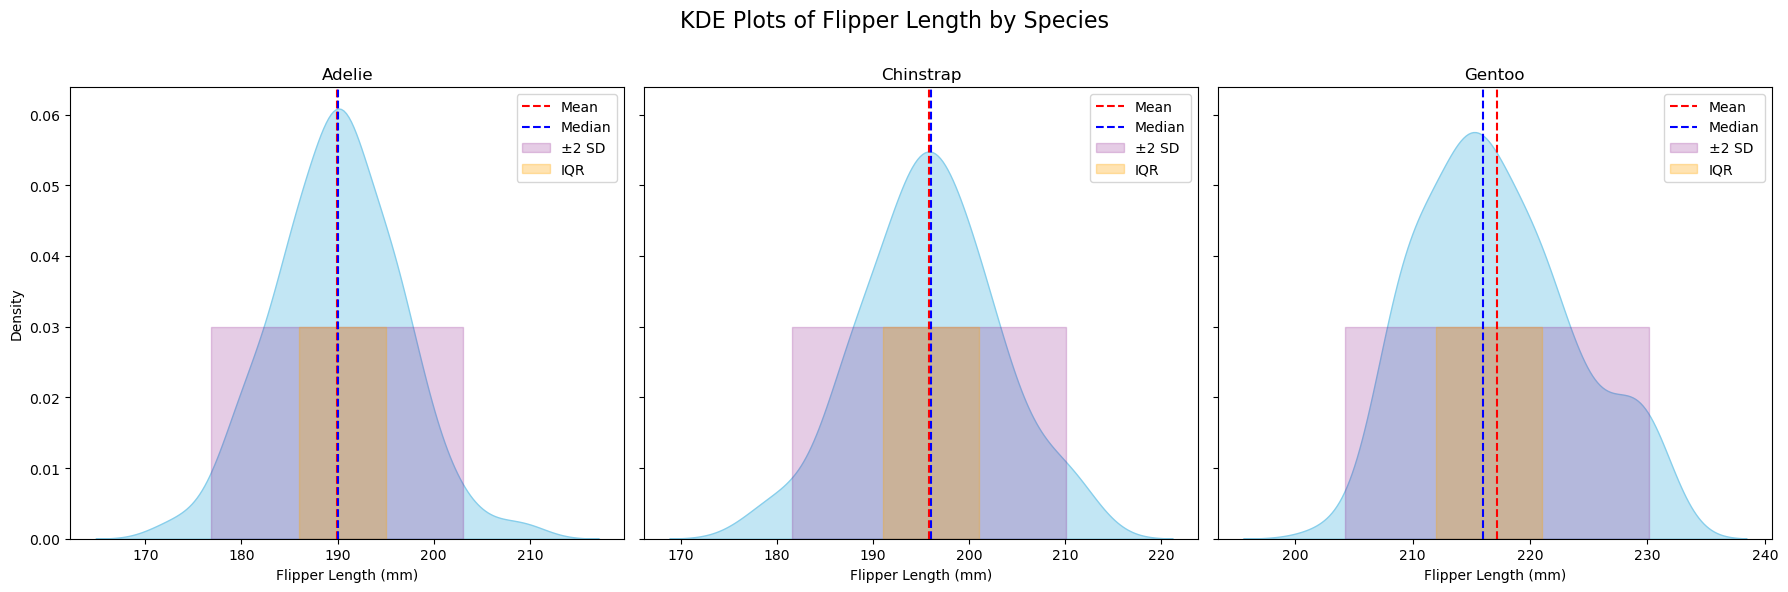

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up the figure with subplots
num_species = pingees['species'].nunique()
fig, axes = plt.subplots(1, num_species, figsize=(18, 6), sharey=True)

# Loop through each species to create KDE plots
species = pingees['species'].unique()
for ax, sp in zip(axes, species):
    # Filter the data for the current species
    data = pingees[pingees['species'] == sp]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = data.mean()
    median = data.median()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    std_dev = data.std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    # Create KDE plot
    sns.kdeplot(data, ax=ax, fill=True, color='skyblue', alpha=0.5)
    
    # Add mean and median lines
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle='--', label='Median')

    # Add shaded areas for range and IQR
    ax.fill_betweenx([0, 0.03], lower_bound, upper_bound, color='purple', alpha=0.2, label='±2 SD')
    ax.fill_betweenx([0, 0.03], Q1, Q3, color='orange', alpha=0.3, label='IQR')
    
    # Set titles and labels
    ax.set_title(sp)
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('KDE Plots of Flipper Length by Species', fontsize=16)
plt.subplots_adjust(top=0.85)  # Adjust the top margin for the main title

# Show the plot
plt.show()

Summary of Chatbot Session 1: "In this session, you worked on visualizing statistical features of the flipper_length_mm variable for each penguin species from the penguins dataset. Initially, you encountered issues using Plotly's add_hline() and add_vline() to mark mean, median, and standard deviation ranges on histograms. We resolved those errors and then moved on to creating Kernel Density Estimation (KDE) plots using Seaborn.

The goal was to visualize the mean, median, interquartile range (IQR), and two standard deviations on the KDE plots, organized in a row of three plots (one for each species). You also asked for an explanation of the IQR concept, which was explained as the range between the first and third quartiles, representing the middle 50% of the data. The session provided code solutions and explanations to help with your data visualization task."

Link to Chatbot Session 1: https://chatgpt.com/share/66f4bad1-89b4-8008-9d61-12105cafad24

3) My personal preference is leaning more towards the histogram, it's just easier on the eyes and doesn't seem as complex as the other ones. I find that the box plot and KDE graph are kind to hard to understand. Like the KDE graph, the histogram can also help predict the shape of the distribution. I think the fact that histograms use bins (the bars) to represent data, it is easier to visualize and interpret. 

Summary of Chatbot Session 2: "In this session, you asked for a comparison between three data distribution visualization methods: box plots, histograms, and kernel density estimators (KDE). I confirmed that your initial descriptions were mostly accurate and provided a more refined contrast between these methods. Then, you requested a more detailed list of pros and cons for each, which I outlined, highlighting the strengths and limitations of each visualization approach. Finally, I summarized the key aspects that differentiate box plots, histograms, and KDEs in terms of their ability to convey distribution information, outliers, frequency, and smoothness of the data."

Link to Chatbot Session 2: https://chatgpt.com/share/66f4be77-6530-8008-871c-ae617b3c443f

4)

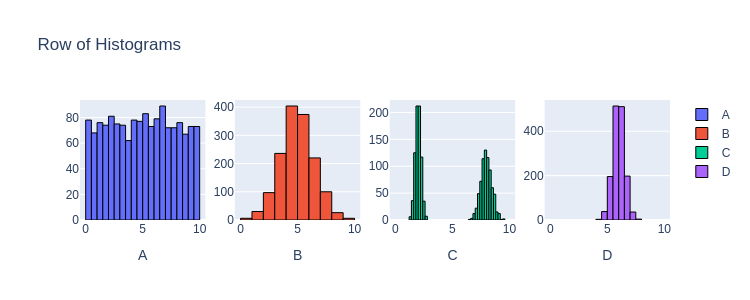

In [100]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4.1) The closest histograms that have similar means and variances would be histogram B and D, both have means that are relatively in the middle near 5-6, and their data points are also distributed in the middle.

4.2) Histogram B, and C have similar means as their average is concentrated around 5, but their variances differ because histogram B's data is distributed around the middle, while histogram C is bimodal, having two peaks.

4.3) I would say none of the histograms have similar variances but different means. The closest histograms would be B and D. They have similar variances but their means are different (although the difference is not too drastic). Histogram B has a mean of around 5 and histogram D has a mean near 6. 

4.4) I think all of the histograms have a similar mean (5-6), but the variances on histogram A and histogram C are quite different from each other, as one is spread across the entire histogram and the other (C) is bimodal. 

5) Right skewness is positive and left skewness is negative. The relationship between the mean and median in this is a result of the outliers. In a right/positive skewed graph the mean is usually higher than the median because the mean is influenced by outliers on the right side while the median is less influenced by outliers. Oppositely, in a left/negative skewed graph the mean is less than the median because the mean value is influence by low outliers, resulting in the mean being less than the median. 

Right-Skewed Data (Sample 1):
Mean: 3.9335023491297054
Median: 3.198525350262159

Left-Skewed Data (Sample 2):
Mean: -3.889966707389275
Median: -3.2842182279157686


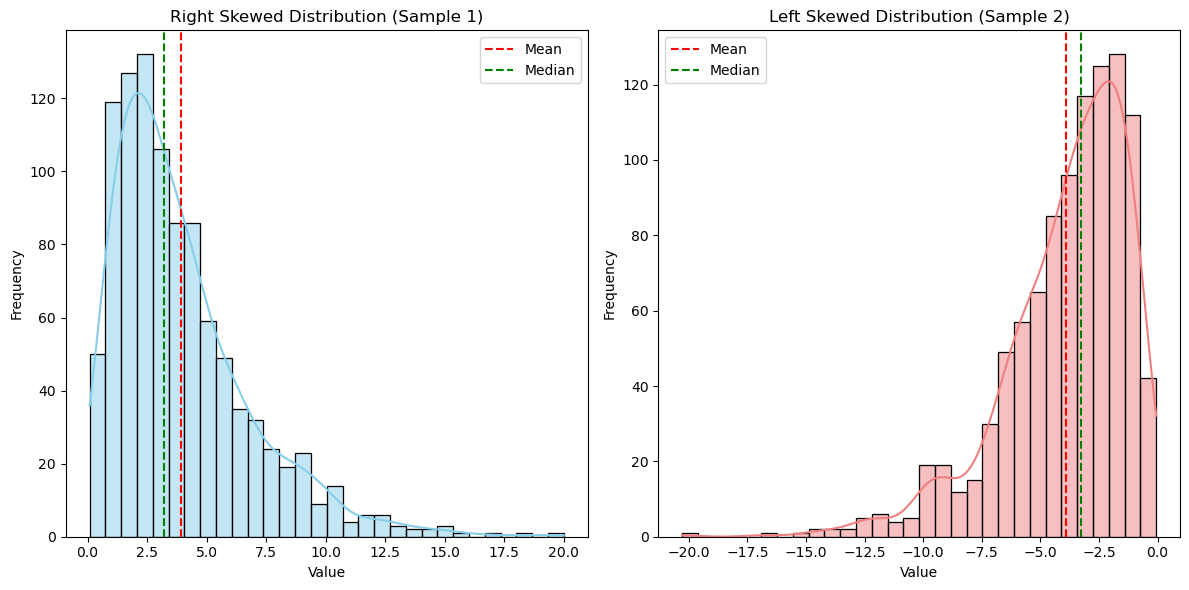

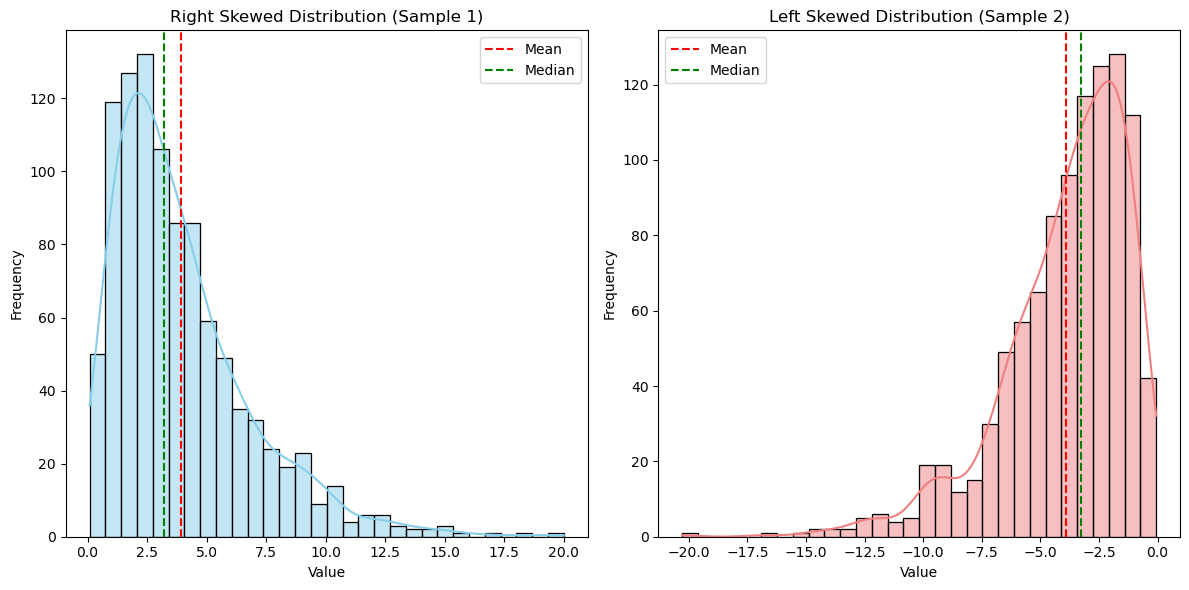

Summary of Results:
For Right-Skewed Distribution:
Mean > Median: 3.9335023491297054 > 3.198525350262159 (Confirmed: Right Skewed)

For Left-Skewed Distribution:
Mean < Median: -3.889966707389275 < -3.2842182279157686 (Confirmed: Left Skewed)


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate right-skewed data using the gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Display basic statistics for sample1
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

print(f"Right-Skewed Data (Sample 1):")
print(f"Mean: {mean1}")
print(f"Median: {median1}")

# Generate left-skewed data by taking the negative of a gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Display basic statistics for sample2
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

print(f"\nLeft-Skewed Data (Sample 2):")
print(f"Mean: {mean2}")
print(f"Median: {median2}")

# Create histograms for both samples
plt.figure(figsize=(12, 6))

# Plot for right-skewed data
plt.subplot(1, 2, 1)
sns.histplot(sample1, bins=30, kde=True, color='skyblue')
plt.axvline(mean1, color='red', linestyle='--', label='Mean')
plt.axvline(median1, color='green', linestyle='--', label='Median')
plt.title('Right Skewed Distribution (Sample 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Plot for left-skewed data
plt.subplot(1, 2, 2)
sns.histplot(sample2, bins=30, kde=True, color='lightcoral')
plt.axvline(mean2, color='red', linestyle='--', label='Mean')
plt.axvline(median2, color='green', linestyle='--', label='Median')
plt.title('Left Skewed Distribution (Sample 2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Create histograms for both samples
plt.figure(figsize=(12, 6))

# Plot for right-skewed data
plt.subplot(1, 2, 1)
sns.histplot(sample1, bins=30, kde=True, color='skyblue')
plt.axvline(mean1, color='red', linestyle='--', label='Mean')
plt.axvline(median1, color='green', linestyle='--', label='Median')
plt.title('Right Skewed Distribution (Sample 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Plot for left-skewed data
plt.subplot(1, 2, 2)
sns.histplot(sample2, bins=30, kde=True, color='lightcoral')
plt.axvline(mean2, color='red', linestyle='--', label='Mean')
plt.axvline(median2, color='green', linestyle='--', label='Median')
plt.title('Left Skewed Distribution (Sample 2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Summary of the findings
print("Summary of Results:")
print("For Right-Skewed Distribution:")
print(f"Mean > Median: {mean1} > {median1} (Confirmed: Right Skewed)")

print("\nFor Left-Skewed Distribution:")
print(f"Mean < Median: {mean2} < {median2} (Confirmed: Left Skewed)")


6)

Column Names:
Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')

Summary Statistics:
       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min    

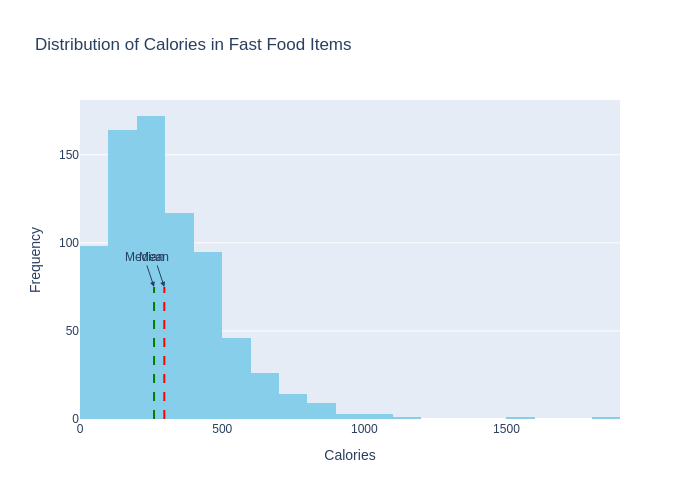

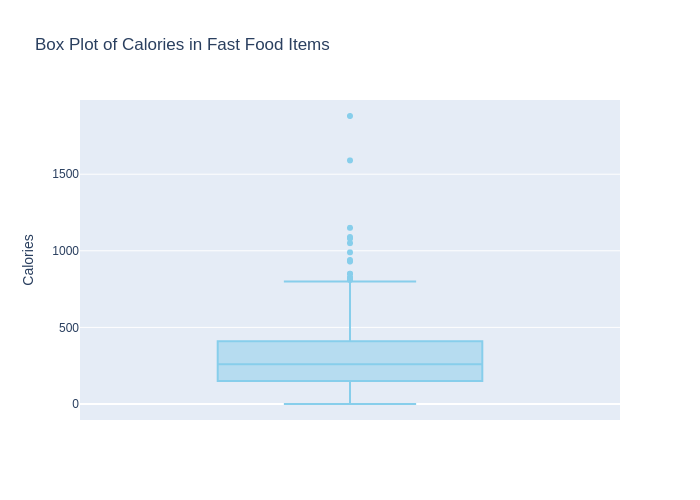

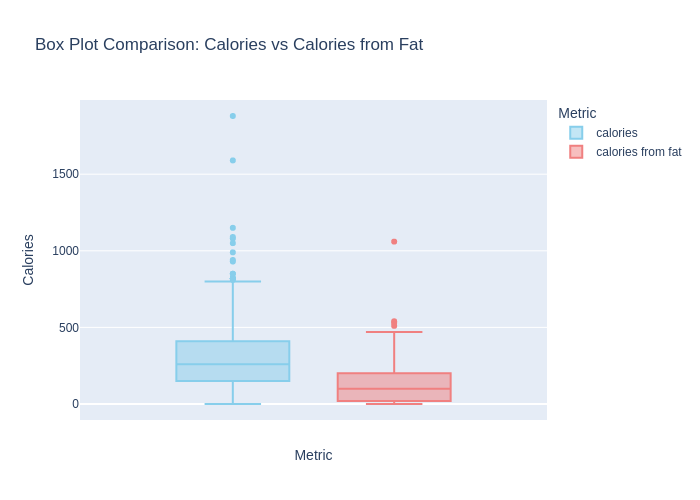

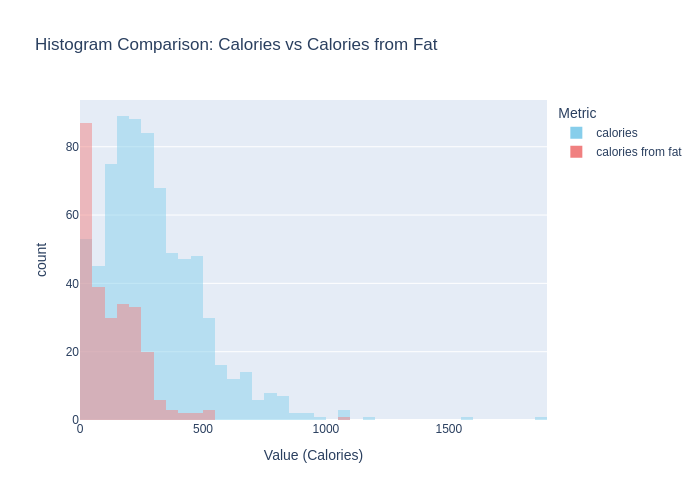

In [103]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

df.head()
print("Column Names:")
print(df.columns)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

import plotly.express as px
fig = px.histogram(df, x='calories', nbins=30, title='Distribution of Calories in Fast Food Items', 
                   labels={'calories': 'Calories'},
                   color_discrete_sequence=['skyblue'])

mean_calories = df['calories'].mean()
median_calories = df['calories'].median()
fig.add_shape(type='line', x0=mean_calories, x1=mean_calories, y0=0, y1=0.1*len(df), 
              line=dict(color='red', dash='dash'), name='Mean')
fig.add_shape(type='line', x0=median_calories, x1=median_calories, y0=0, y1=0.1*len(df), 
              line=dict(color='green', dash='dash'), name='Median')

fig.update_layout(
    annotations=[
        dict(x=mean_calories, y=0.1*len(df), text='Mean', showarrow=True, arrowhead=2),
        dict(x=median_calories, y=0.1*len(df), text='Median', showarrow=True, arrowhead=2)
    ],
    xaxis_title='Calories',
    yaxis_title='Frequency'
)

fig.show(renderer="png")

fig = px.box(df, y='calories', title='Box Plot of Calories in Fast Food Items', 
             labels={'calories': 'Calories'},
             color_discrete_sequence=['skyblue'])
fig.update_layout(
    yaxis_title='Calories',
    boxmode='overlay'  # Overlaying boxes for better visibility
)

fig.show(renderer="png")

df_comparison = df[['calories', 'calories from fat']].melt(var_name='Metric', value_name='Value')

fig = px.box(df_comparison, y='Value', color='Metric', title='Box Plot Comparison: Calories vs Calories from Fat',
             labels={'Value': 'Value (Calories)'}, 
             color_discrete_sequence=['skyblue', 'lightcoral'])

fig.update_layout(
    yaxis_title='Calories',
    xaxis_title='Metric',
    boxmode='group'  # Group the box plots for side-by-side comparison
)

fig.show(renderer="png")

fig = px.histogram(df_comparison, x='Value', color='Metric', barmode='overlay',
                   title='Histogram Comparison: Calories vs Calories from Fat',
                   labels={'Value': 'Value (Calories)'}, 
                   color_discrete_sequence=['skyblue', 'lightcoral'])

fig.show(renderer="png")

Summary of Chatbot Session 3: "Here’s a summary of our session:

Understanding the Relationship Between Mean and Median:

You asked about the relationship between the mean and median, especially in the context of skewed data. We discussed that in right-skewed distributions, the mean is typically greater than the median, and in left-skewed distributions, the median is greater than the mean.
Code Explanation for Skewed Data:

You shared Python code that generates data using the gamma distribution to demonstrate the difference between the mean and median. I explained how the gamma distribution models right-skewed data and how negative values can be used for left-skewed data. The mean and median for each distribution are calculated and compared to illustrate skewness.
Plotting a Histogram:

We attempted to visualize the calories column from a fast food dataset using a histogram. A small issue arose due to a mismatch in column names, which was resolved by using the correct column name (calories instead of Calories).
Box Plot to Identify Outliers:

I explained how to create a box plot using Plotly Express to further explore the distribution of calories and identify outliers. Box plots are useful for summarizing data distribution and spotting extreme values.
Comparing Calories and Calories from Fat:

To explore the relationship between calories and calories from fat, we created side-by-side box plots. This helped visualize how calories from fat contribute to the total calorie count and highlight any outliers in both distributions.
The key takeaway is that while calories from fat contribute to the total calorie content, the majority of the calories often come from other sources (like carbohydrates and protein). The box plots allow a comparison of their distributions and an understanding of whether certain items have a higher fat content.
This session focused on statistical concepts like skewness, mean/median differences, and visualizing data distributions using histograms and box plots. We applied these concepts to a fast food nutritional dataset to compare total calories and calories from fat, gaining insight into their relationship."

Link to Chatbot Session 3: https://chatgpt.com/share/66f59c8e-9694-8008-89c1-4eb9bad61d83

7) 

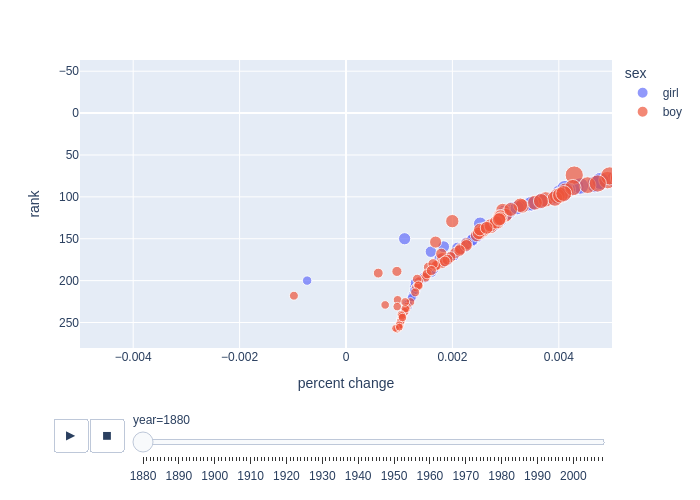

In [118]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer="png")

8)

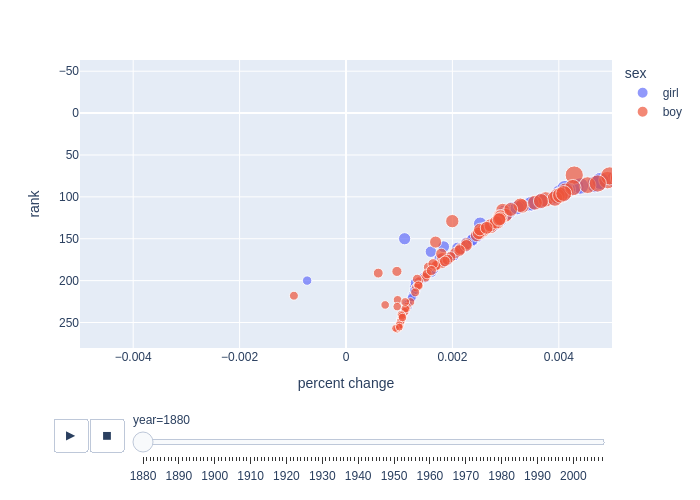

In [115]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9) Mostly